In [1]:
import os
import pickle
import pandas as pd
from scipy.stats import spearmanr
from BuyStrategy import BuyStrategy

In [4]:
Tests = ["2023q1", "2023q2", "2023q3", "2023q4", "2024q1", "2024q2"]
Results = {}
for quarter in Tests:
    with open(f'/home/user92/model_train/TreeModel/TreeResults528ndcg2/result_{quarter}.pkl', 'rb') as f:
        Results[quarter] = pickle.load(f)

In [22]:
for i in Results['2023q1']:
    print(i)

test_quarter
model_params
best_iterations
stats
ModelResult


In [26]:
Results['2023q1']['ModelResult'].max()

pred      1.310038e+00
liquid    1.000000e+08
ret       9.310927e-02
dtype: float64

In [27]:
Results['2023q1']['ModelResult'].min()

pred     -1.541302
liquid    0.000000
ret      -0.062142
dtype: float64

In [11]:
daily_corrs_lis = [] 
for quarter in Tests:
    data = Results[quarter]["ModelResult"]
    daily_corrs = data.groupby('date').apply(lambda x: pd.Series(spearmanr(x['pred'], x['ret']), index=['rho', 'pval'])).reset_index()
    daily_corrs_lis.append(daily_corrs)
spearman_ic_df = pd.concat(daily_corrs_lis, ignore_index=True)
spearman_ic_df

,date,rho,pval
0,2023-01-03,0.131280,1.381418e-11
1,2023-01-04,0.094478,1.194733e-06
2,2023-01-05,0.038134,5.031197e-02
3,2023-01-06,0.049631,1.081796e-02
4,2023-01-09,0.101271,1.844535e-07
...,...,...,...
354,2024-06-24,0.095246,6.089437e-07
355,2024-06-25,0.305492,4.154913e-60
356,2024-06-26,0.275162,1.216731e-48
357,2024-06-27,0.098730,2.319655e-07


In [12]:
for i in Results["2023q1"]:
    print(i)

test_quarter
model_params
best_iterations
stats
ModelResult


In [5]:
for quarter in Tests:
    print(Results[quarter]["model_params"], Results[quarter]["best_iterations"])

{'learning_rate': 0.02623459118934199, 'num_leaves': 490, 'min_data_in_leaf': 1987, 'lambda_l2': 0.23696640614346087, 'subsample': 0.8783777987050957, 'colsample_bytree': 0.8987464493740384} [167, 215, 124, 132]
{'learning_rate': 0.02848982004010423, 'num_leaves': 986, 'min_data_in_leaf': 1057, 'lambda_l2': 0.8217348095605368, 'subsample': 0.8863019653945348, 'colsample_bytree': 0.7013146146717865} [150, 222, 135, 183]
{'learning_rate': 0.0259235961461698, 'num_leaves': 1619, 'min_data_in_leaf': 1220, 'lambda_l2': 0.8207943434077803, 'subsample': 0.8126676621523042, 'colsample_bytree': 0.9407034376796781} [160, 201, 63, 130]
{'learning_rate': 0.023088376080409874, 'num_leaves': 1381, 'min_data_in_leaf': 462, 'lambda_l2': 0.014631878014915965, 'subsample': 0.6607430216986924, 'colsample_bytree': 0.505858552770998} [43, 38, 116, 100]
{'learning_rate': 0.029980182195543787, 'num_leaves': 910, 'min_data_in_leaf': 408, 'lambda_l2': 0.022202430386145815, 'subsample': 0.7279859214926422, 'col

In [14]:
daily_corrs_lis = [] 
for quarter in Tests:
    data = Results[quarter]["ModelResult"]
    daily_corrs = data.groupby('date').apply(lambda x: pd.Series(spearmanr(x['pred'], x['ret']), index=['rho', 'pval'])).reset_index()
    daily_corrs_lis.append(daily_corrs)
spearman_ic_df = pd.concat(daily_corrs_lis, ignore_index=True)
spearman_ic_df

,date,rho,pval
0,2023-01-03,0.131280,1.381418e-11
1,2023-01-04,0.094478,1.194733e-06
2,2023-01-05,0.038134,5.031197e-02
3,2023-01-06,0.049631,1.081796e-02
4,2023-01-09,0.101271,1.844535e-07
...,...,...,...
354,2024-06-24,0.095246,6.089437e-07
355,2024-06-25,0.305492,4.154913e-60
356,2024-06-26,0.275162,1.216731e-48
357,2024-06-27,0.098730,2.319655e-07


In [15]:
spearman_ic_df.mean()

/tmp/ipykernel_2897796/960528770.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  spearman_ic_df.mean()


rho     0.124467
pval    0.036271
dtype: float64

In [16]:
from scipy.stats import pearsonr  # 引入 pearsonr

daily_corrs_lis = [] 
for quarter in Tests:
    data = Results[quarter]["ModelResult"]
    daily_corrs = data.groupby('date').apply(
        lambda x: pd.Series(pearsonr(x['pred'], x['ret']), index=['rho', 'pval'])
    ).reset_index()
    daily_corrs_lis.append(daily_corrs)

full_ic_df = pd.concat(daily_corrs_lis, ignore_index=True)

In [17]:
full_ic_df.mean()

/tmp/ipykernel_2897796/1676647190.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  full_ic_df.mean()


rho     0.119311
pval    0.029529
dtype: float64

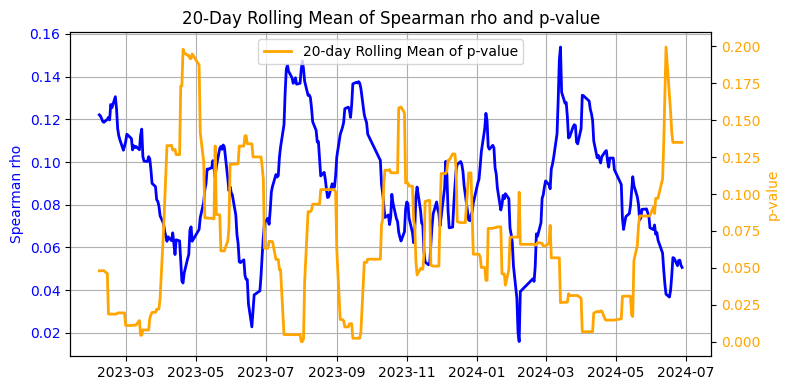

In [15]:
import matplotlib.pyplot as plt

# ✅ 设定滚动窗口大小
window_size = 20

# ✅ 如果 'date' 是列，先转成索引
full_ic_df['date'] = pd.to_datetime(full_ic_df['date'])
full_corr_df = full_ic_df.set_index('date')

# ✅ 计算滚动平均
rolling_rho = full_corr_df['rho'].rolling(window=window_size).mean()
rolling_pval = full_corr_df['pval'].rolling(window=window_size).mean()
fig, ax1 = plt.subplots(figsize=(8, 4))

# 左轴画 rho
ax1.plot(rolling_rho, label=f'{window_size}-day Rolling Mean of rho', color='blue', linewidth=2)
ax1.set_ylabel('Spearman rho', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# 右轴画 p-value
ax2 = ax1.twinx()
ax2.plot(rolling_pval, label=f'{window_size}-day Rolling Mean of p-value', color='orange', linewidth=2)
ax2.set_ylabel('p-value', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# ✅ 标题与图例
plt.title(f'{window_size}-Day Rolling Mean of Spearman rho and p-value')
fig.tight_layout()
plt.legend()
plt.show()

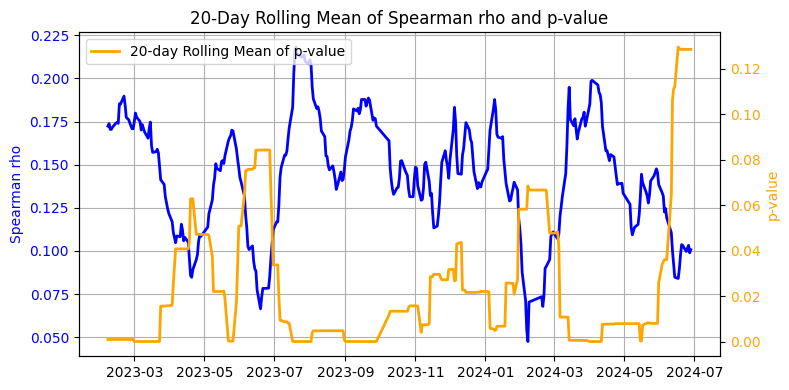

In [5]:
import matplotlib.pyplot as plt

# ✅ 设定滚动窗口大小
window_size = 20

# ✅ 如果 'date' 是列，先转成索引
full_ic_df['date'] = pd.to_datetime(full_ic_df['date'])
full_corr_df = full_ic_df.set_index('date')

# ✅ 计算滚动平均
rolling_rho = full_corr_df['rho'].rolling(window=window_size).mean()
rolling_pval = full_corr_df['pval'].rolling(window=window_size).mean()
fig, ax1 = plt.subplots(figsize=(8, 4))

# 左轴画 rho
ax1.plot(rolling_rho, label=f'{window_size}-day Rolling Mean of rho', color='blue', linewidth=2)
ax1.set_ylabel('Spearman rho', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# 右轴画 p-value
ax2 = ax1.twinx()
ax2.plot(rolling_pval, label=f'{window_size}-day Rolling Mean of p-value', color='orange', linewidth=2)
ax2.set_ylabel('p-value', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# ✅ 标题与图例
plt.title(f'{window_size}-Day Rolling Mean of Spearman rho and p-value')
fig.tight_layout()
plt.legend()
plt.show()

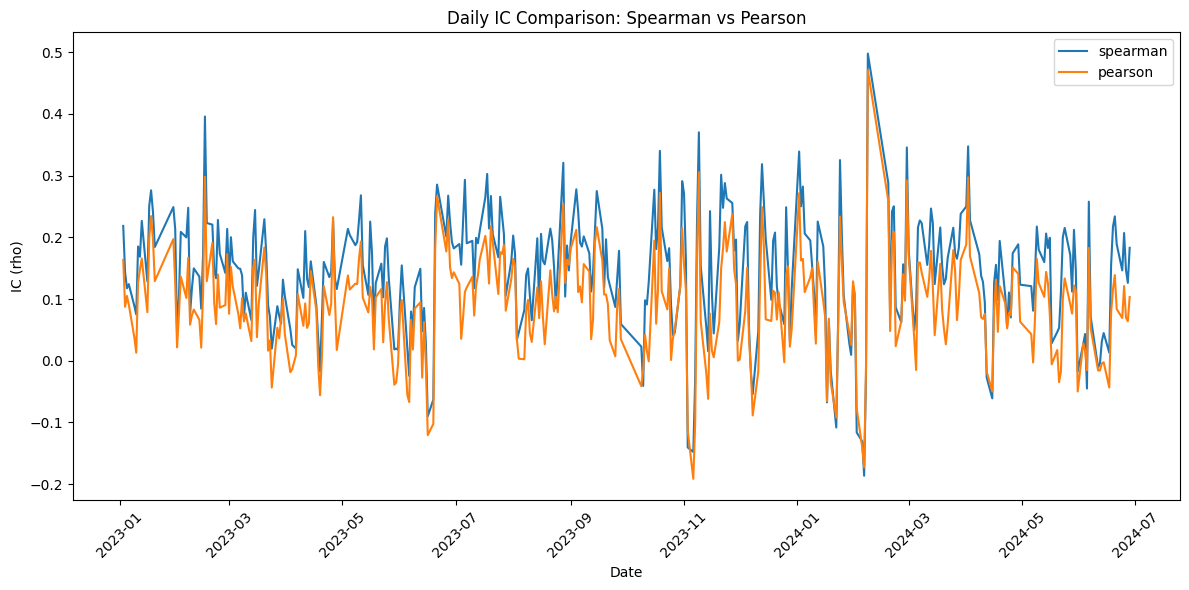

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

spearman_list = []
pearson_list = []

for quarter in Tests:
    data = Results[quarter]["ModelResult"]

    # Spearman
    spearman_df = data.groupby('date').apply(
        lambda x: pd.Series(spearmanr(x['predrank'], x['ret']), index=['rho', 'pval'])
    ).reset_index()
    spearman_df['type'] = 'spearman'
    spearman_list.append(spearman_df)

    # Pearson
    pearson_df = data.groupby('date').apply(
        lambda x: pd.Series(pearsonr(x['predrank'], x['ret']), index=['rho', 'pval'])
    ).reset_index()
    pearson_df['type'] = 'pearson'
    pearson_list.append(pearson_df)

# 合并
all_df = pd.concat(spearman_list + pearson_list, ignore_index=True)

# 画图
plt.figure(figsize=(12, 6))
for corr_type in ['spearman', 'pearson']:
    sub_df = all_df[all_df['type'] == corr_type]
    plt.plot(sub_df['date'], sub_df['rho'], label=corr_type)

plt.xlabel('Date')
plt.ylabel('IC (rho)')
plt.title('Daily IC Comparison: Spearman vs Pearson')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
greedy_ret_lis = [] 
equal_ret_lis = []
liquid_equal_ret_lis = []
for quarter in Tests:
    greedy_ret = Results[quarter]["stats"][0]
    equal_ret = Results[quarter]["stats"][1]
    liquid_equal_ret = Results[quarter]["stats"][2]
    greedy_ret_lis.append(greedy_ret)
    equal_ret_lis.append(equal_ret)
    liquid_equal_ret_lis.append(liquid_equal_ret)
greedy_ret_con = pd.concat(greedy_ret_lis, ignore_index=True)
equal_ret_con = pd.concat(equal_ret_lis, ignore_index=True)
liquid_equal_ret_con = pd.concat(liquid_equal_ret_lis, ignore_index=True)

In [19]:
greedy_ret_con.mean()

/tmp/ipykernel_2897796/2647562765.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  greedy_ret_con.mean()
/tmp/ipykernel_2897796/2647562765.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  greedy_ret_con.mean()


weighted_return    0.000963
position_ratio     0.998838
dtype: float64

In [12]:
equal_ret_con.mean()

/tmp/ipykernel_2810065/2580488961.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  equal_ret_con.mean()
/tmp/ipykernel_2810065/2580488961.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  equal_ret_con.mean()


weighted_return    0.000624
position_ratio     1.000000
dtype: float64

In [13]:
greedy_ret_lis = [] 
equal_ret_lis = []
liquid_equal_ret_lis = []
for quarter in Tests:
    greedy_ret = Results[quarter]["stats"][0]
    equal_ret = Results[quarter]["stats"][1]
    liquid_equal_ret = Results[quarter]["stats"][2]
    greedy_ret_lis.append(greedy_ret)
    equal_ret_lis.append(equal_ret)
    liquid_equal_ret_lis.append(liquid_equal_ret)
greedy_ret_con = pd.concat(greedy_ret_lis, ignore_index=True)
equal_ret_con = pd.concat(equal_ret_lis, ignore_index=True)
liquid_equal_ret_con = pd.concat(liquid_equal_ret_lis, ignore_index=True)

In [16]:
greedy_ret_con.mean()

/tmp/ipykernel_2810065/2647562765.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  greedy_ret_con.mean()
/tmp/ipykernel_2810065/2647562765.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  greedy_ret_con.mean()


weighted_return    0.001627
position_ratio     1.000000
dtype: float64

In [15]:
equal_ret_con.mean()

/tmp/ipykernel_2810065/2580488961.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  equal_ret_con.mean()
/tmp/ipykernel_2810065/2580488961.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  equal_ret_con.mean()


weighted_return    0.000624
position_ratio     1.000000
dtype: float64

In [14]:
liquid_equal_ret_con.mean()

/tmp/ipykernel_2810065/2802517366.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  liquid_equal_ret_con.mean()
/tmp/ipykernel_2810065/2802517366.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  liquid_equal_ret_con.mean()


weighted_return    0.000391
position_ratio     1.000000
dtype: float64

In [15]:
liquid_equal_ret_con

,date,weighted_return,position_ratio,fold,strategy
0,2023-01-03,0.002319,1.0,2023q1,liquid_equal
1,2023-01-04,-0.001408,1.0,2023q1,liquid_equal
2,2023-01-05,-0.005309,1.0,2023q1,liquid_equal
3,2023-01-06,-0.000504,1.0,2023q1,liquid_equal
4,2023-01-09,0.002724,1.0,2023q1,liquid_equal
...,...,...,...,...,...
354,2024-06-24,0.000628,1.0,2024q2,liquid_equal
355,2024-06-25,0.001790,1.0,2024q2,liquid_equal
356,2024-06-26,0.004232,1.0,2024q2,liquid_equal
357,2024-06-27,-0.000147,1.0,2024q2,liquid_equal


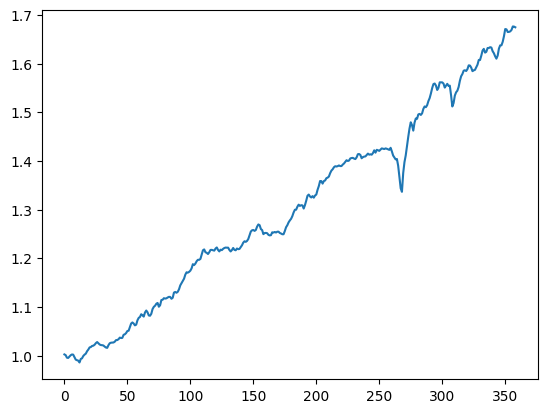

In [14]:
import matplotlib.pyplot as plt
cum_ret = (1+liquid_equal_ret_con['weighted_return']).cumprod()
plt.plot(cum_ret)
plt.show()


In [20]:
Results["2023Q1"]["ModelResult"]

predrank       liquid       ret
date       Code                                      
2023-01-03 000001  1280.039001  100000000.0  0.013969
           000002  1303.892650   33459660.0  0.007718
           000006  1156.573674   33225905.4 -0.004291
           000007  1278.234267     521472.0 -0.000166
           000008  1342.133034     564795.0  0.008255
...                        ...          ...       ...
2023-03-31 301396  1147.791831    1198743.0  0.009467
           301398  1067.968948    4228902.0  0.006577
           301408  1249.392894    1146600.0  0.002093
           301419  1172.335700    1637280.0  0.000055
           301439  1204.376806    2207655.0 -0.003070

[156218 rows x 3 columns]